In [33]:
""" Tutorial Link
https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
"""

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

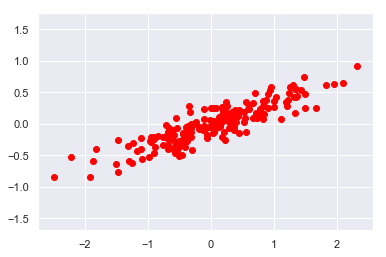

In [34]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1], color= 'red')
plt.axis('equal');


In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [36]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [37]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


(-2.7391278364515688,
 2.5801310701596343,
 -0.9477947579593763,
 1.0195904306706842)

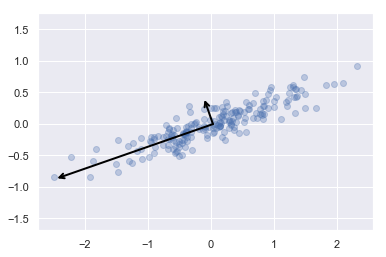

In [38]:
def draw_vector(v0,v1):
    ax = None or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0,shrinkB=0, color='black')
    ax.annotate('',v1,v0,arrowprops=arrowprops)
    
# Plot Data
plt.scatter(X[:,0],X[:,1],alpha=0.3)

for length,vector in zip(pca.explained_variance_,pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_,pca.mean_ + v)
plt.axis('equal')

In [39]:
## PCA as a dimentionality reduction transform
pca = PCA(n_components=1)
pca.fit(X)
x_pca = pca.transform(X)
print("Original Shape:", X.shape)
print("transformed Shap: ", x_pca.shape)


Original Shape: (200, 2)
transformed Shap:  (200, 1)


(-2.77152878069022, 2.661757596590677, -0.9964674432667127, 1.0219081775900811)

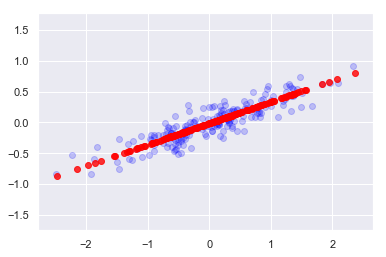

In [40]:
X_new = pca.inverse_transform(x_pca)
plt.scatter(X[:,0], X[:,1],alpha=0.2,color='blue')
plt.scatter(X_new[:,0],X_new[:,1],alpha=0.8,color='red')
plt.axis('equal')

In [41]:
# PCA for visualization

from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

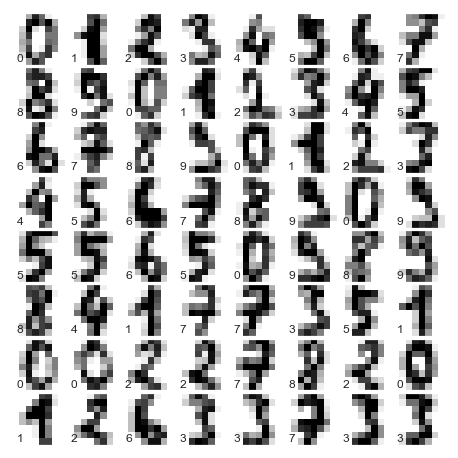

In [42]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [46]:
# Project from 64 to 2 dimension
pca = PCA(2)
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


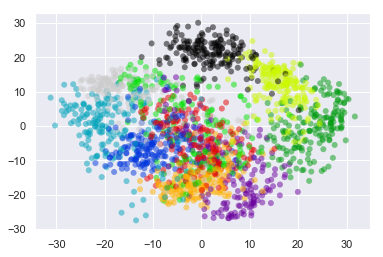

In [51]:
plt.scatter(projected[:,0], projected[:,1],c = digits.target, edgecolors='none', alpha=0.5,cmap=plt.cm.get_cmap('nipy_spectral',10))
